In [2]:
import pandas as pd
from config.paths import get_project_root_path


DATASET_NAME = "les_miserables"
PARAMS_NAMES = ["number_of_pivots", "number_of_iterations", "eps"]



data_df_dict = {}
for params_name in PARAMS_NAMES:
    data_path = (
        get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("regression_analysis")
        .joinpath("grid")
        .joinpath(f"{DATASET_NAME}.pkl")
    )
    df = pd.read_pickle(data_path)
    # df = df.query('')
    data_df_dict[params_name] = pd.read_pickle(data_path)


In [3]:
df

,data_id,pos,angular_resolution,aspect_ratio,crossing_angle,crossing_number,gabriel_graph_property,ideal_edge_lengths,neighborhood_preservation,node_resolution,stress,number_of_pivots,number_of_iterations,eps
0,bb2b7119-883e-4089-b4be-ec98b2150af5,"{'Napoleon': (-43.88753890991211, 22.703603744...",995.080139,-0.643333,1003.676880,2363.0,99974.500000,44.471745,-0.270000,22620.404297,503.152740,5,10,0.05
1,4e9ce796-cd3d-48d0-a551-59dfc4c7b4b3,"{'Napoleon': (37.24515914916992, 23.3625545501...",1029.114502,-0.781833,995.103638,2506.0,84578.078125,34.284576,-0.209524,14894.092773,543.295227,5,10,0.05
2,5f4303bd-4857-47b3-bc66-664737b0acd7,"{'Napoleon': (-104.46096801757812, 22.14434051...",977.956604,-0.762826,827.940247,1980.0,60198.386719,40.869736,-0.372973,20840.253906,340.642731,5,10,0.05
3,3c22943f-fe59-4f84-ac0f-d6d70f0c9259,"{'Napoleon': (-42.352447509765625, -64.2898406...",1008.232727,-0.820159,915.304993,2173.0,78277.851562,49.901482,-0.349270,24517.285156,393.484222,5,10,0.05
4,891e3ff8-8a70-4e41-a1b9-b2aed4773038,"{'Napoleon': (52.90644073486328, -86.452156066...",1011.226013,-0.962789,968.700562,2514.0,83527.523438,44.770088,-0.286076,21644.873047,443.041748,5,10,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,63900b70-f2a8-4c46-aa40-ecacbd7d1c77,"{'Napoleon': (-21.87883949279785, -116.3702239...",963.601440,-0.951306,738.795288,1716.0,37583.839844,40.732639,-0.433004,26084.271484,263.999084,100,200,1.00
79996,2a617a14-1107-4faf-a1dc-39054737c62b,"{'Napoleon': (191.61720275878906, -63.49407577...",965.940918,-0.944355,734.848755,1858.0,46779.156250,39.943027,-0.376694,25998.394531,267.409424,100,200,1.00
79997,fb3ef4b5-5e72-4bbe-9c8a-5404c12cafb6,"{'Napoleon': (56.74190902709961, 5.02871751785...",960.603394,-0.911663,842.327087,1999.0,38525.578125,37.485138,-0.405256,24615.376953,263.364380,100,200,1.00
79998,1dff3d41-310f-427f-abc0-c5e9c509d98c,"{'Napoleon': (2.6762869358062744, -179.4757385...",977.155334,-0.936171,707.893921,1715.0,49649.781250,48.228676,-0.470333,24802.373047,274.156219,100,200,1.00


In [9]:
from config.quality_metrics import ALL_QM_NAMES


x = {}
y = {}

for params_name in PARAMS_NAMES:
    x[params_name] = data_df_dict[params_name][[params_name]]
    y[params_name] = data_df_dict[params_name][ALL_QM_NAMES]
    # x1[qm_name]= data_df_dict[qm_name][PARAMS_NAMES[0]]
    # x2[qm_name]= data_df_dict[qm_name][PARAMS_NAMES[1]]
    # x3[qm_name]= data_df_dict[qm_name][PARAMS_NAMES[2]]


In [10]:
from sklearn.preprocessing import StandardScaler


sscaler = StandardScaler()
xss = {}
yss = {}
for params_name in PARAMS_NAMES:
    sscaler.fit(x[params_name])
    xss[params_name] = sscaler.transform(x[params_name])
    yss[params_name] = {}

for params_name in PARAMS_NAMES:
    for qm_name in ALL_QM_NAMES:
        sscaler.fit(y[params_name][[qm_name]])
        yss[params_name][qm_name] = sscaler.transform(y[params_name][[qm_name]])


number_of_pivots angular_resolution
number_of_pivots aspect_ratio
number_of_pivots crossing_angle
number_of_pivots crossing_number
number_of_pivots gabriel_graph_property
number_of_pivots ideal_edge_lengths
number_of_pivots neighborhood_preservation
number_of_pivots node_resolution
number_of_pivots stress
number_of_iterations angular_resolution
number_of_iterations aspect_ratio
number_of_iterations crossing_angle
number_of_iterations crossing_number
number_of_iterations gabriel_graph_property
number_of_iterations ideal_edge_lengths
number_of_iterations neighborhood_preservation
number_of_iterations node_resolution
number_of_iterations stress
eps angular_resolution
eps aspect_ratio
eps crossing_angle


/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_42486/667136456.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axis = plt.subplots(1, 1, figsize=(8, 8))


eps crossing_number
eps gabriel_graph_property
eps ideal_edge_lengths
eps neighborhood_preservation
eps node_resolution
eps stress


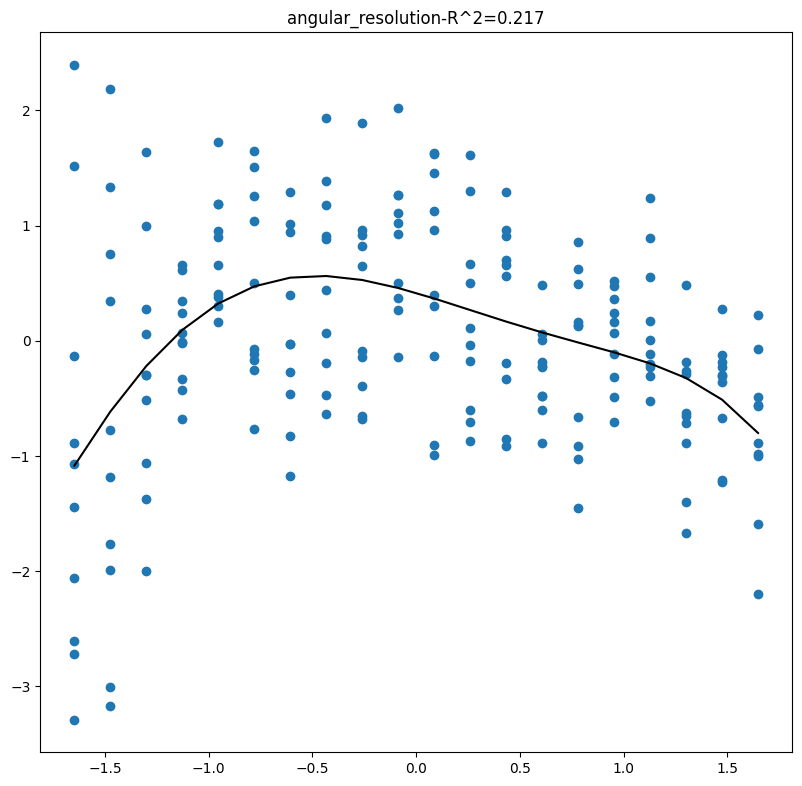

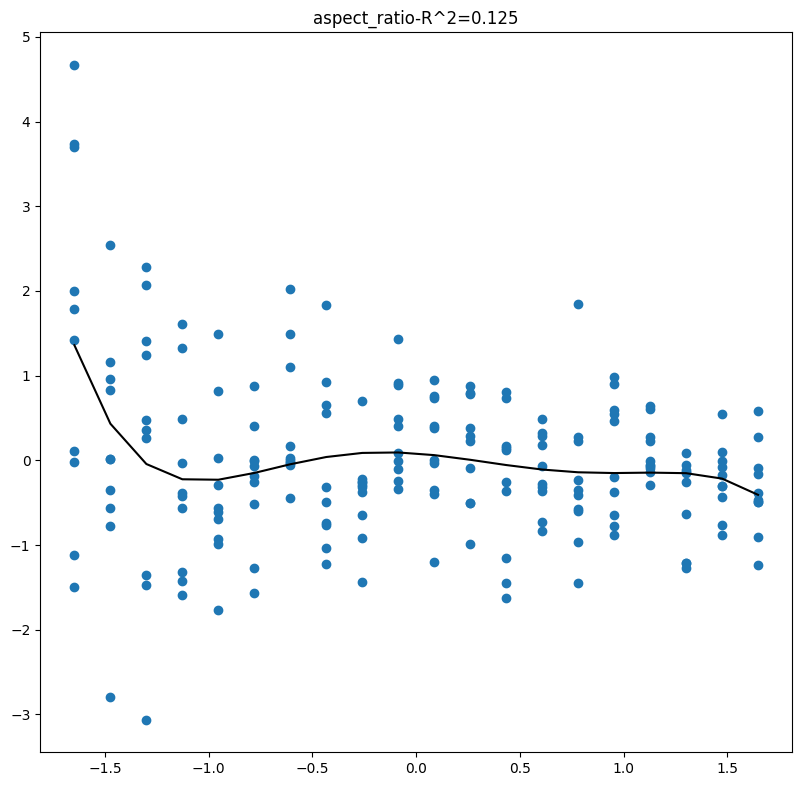

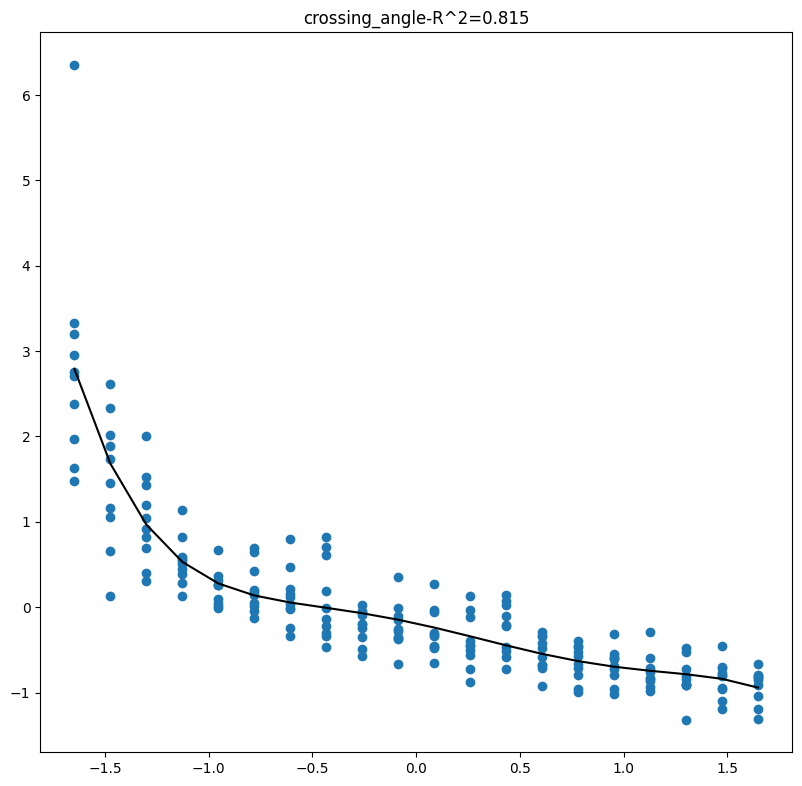

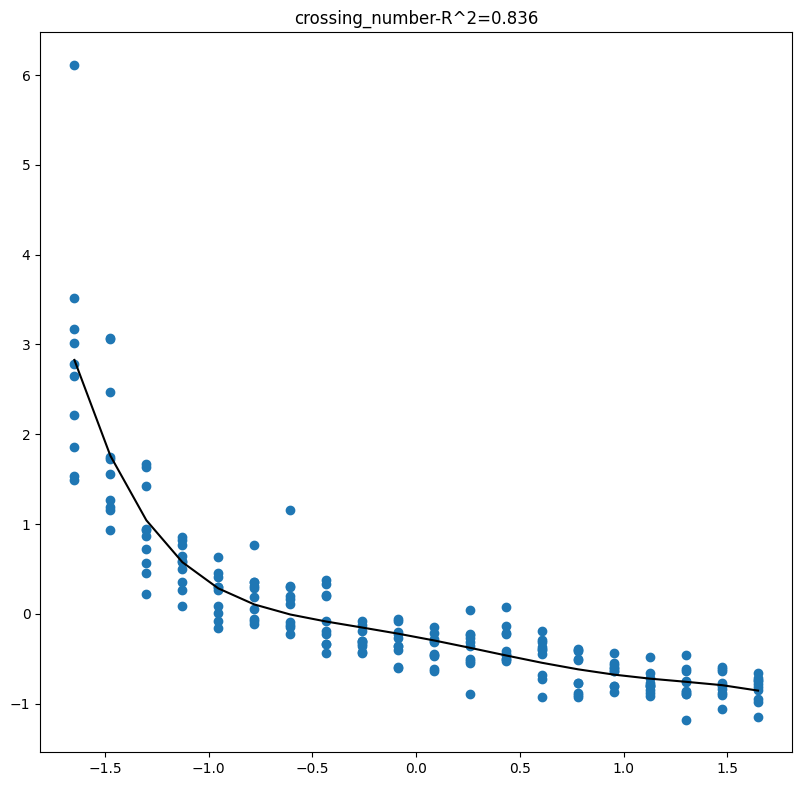

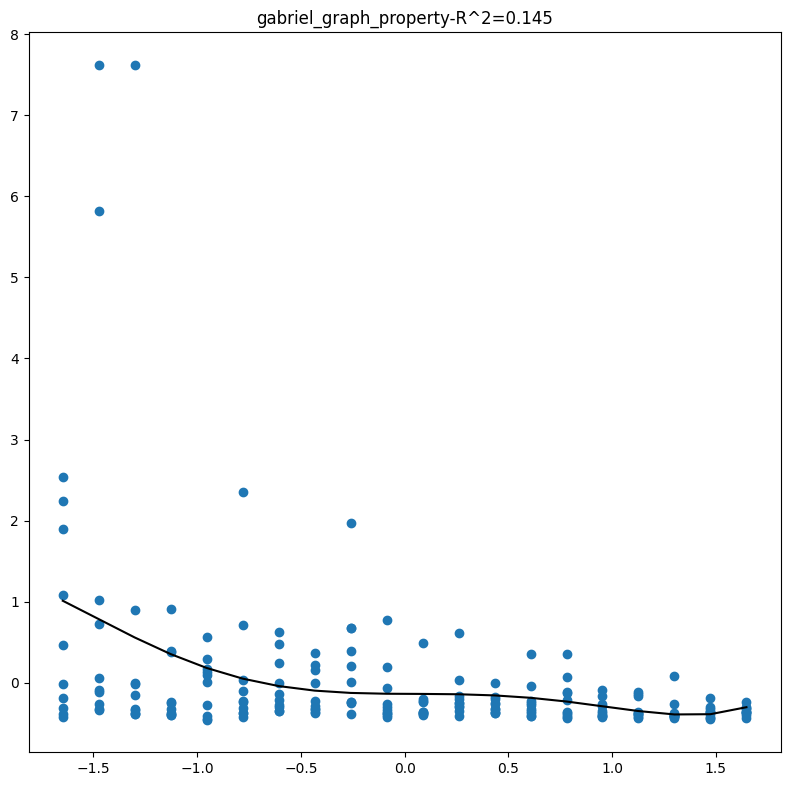

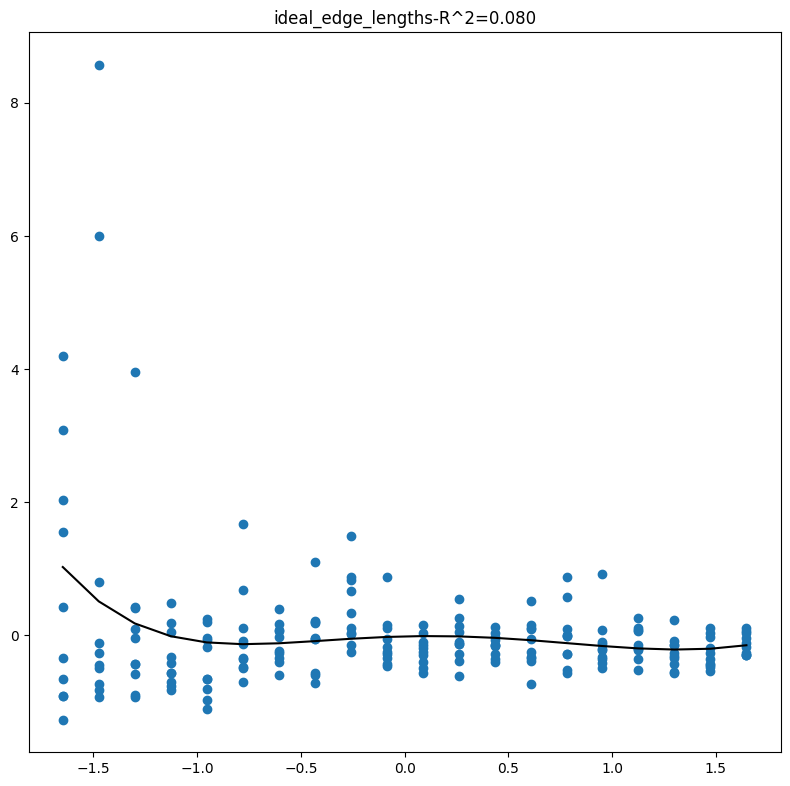

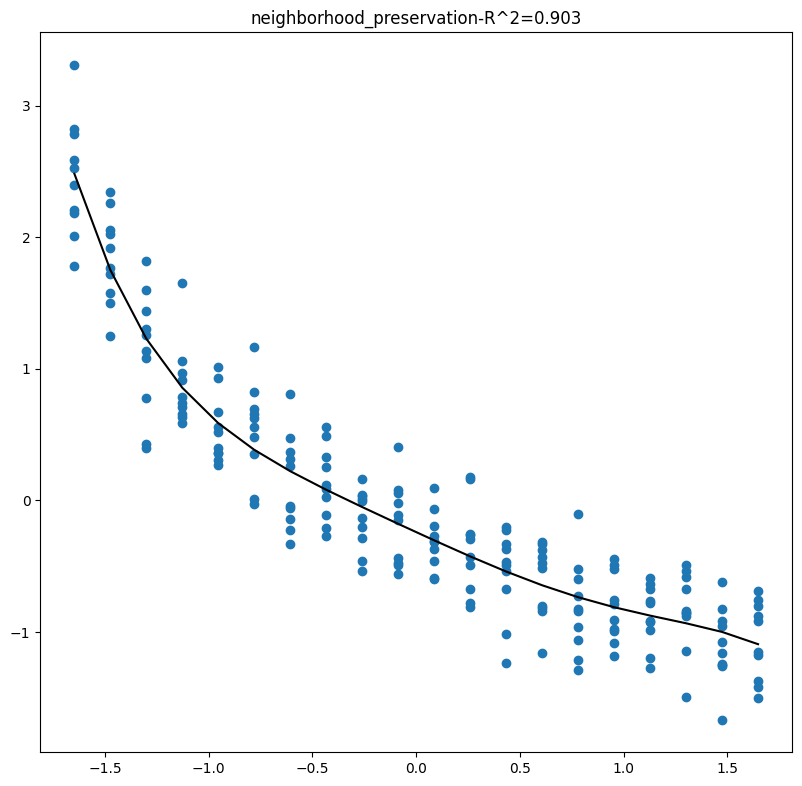

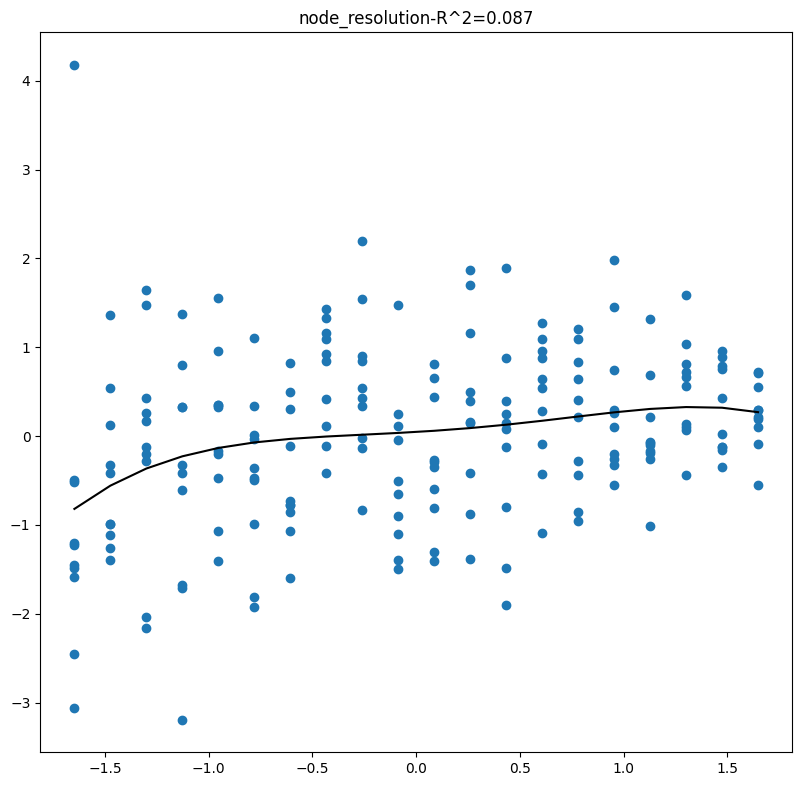

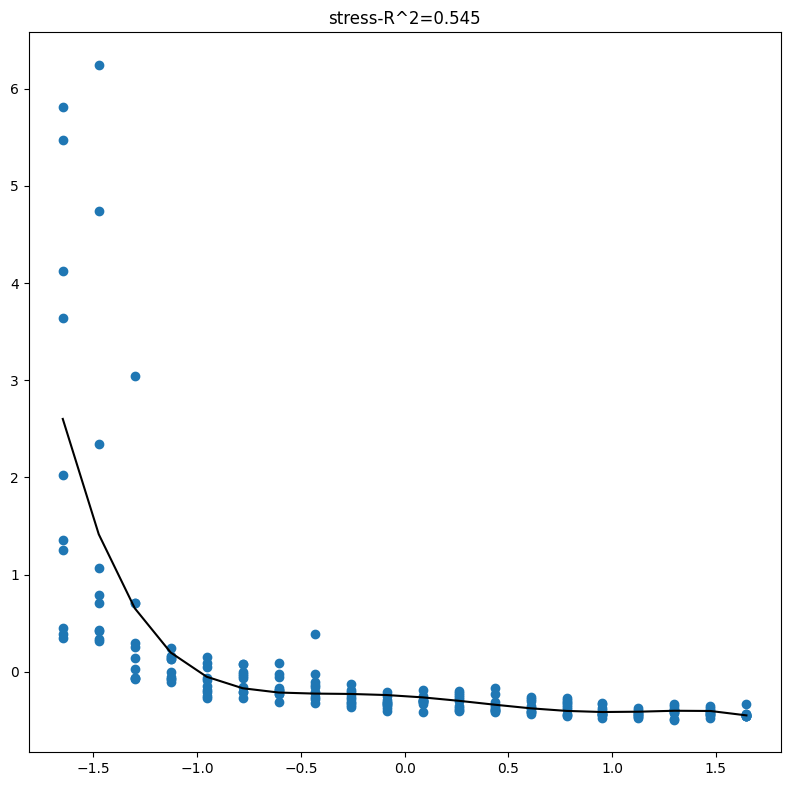

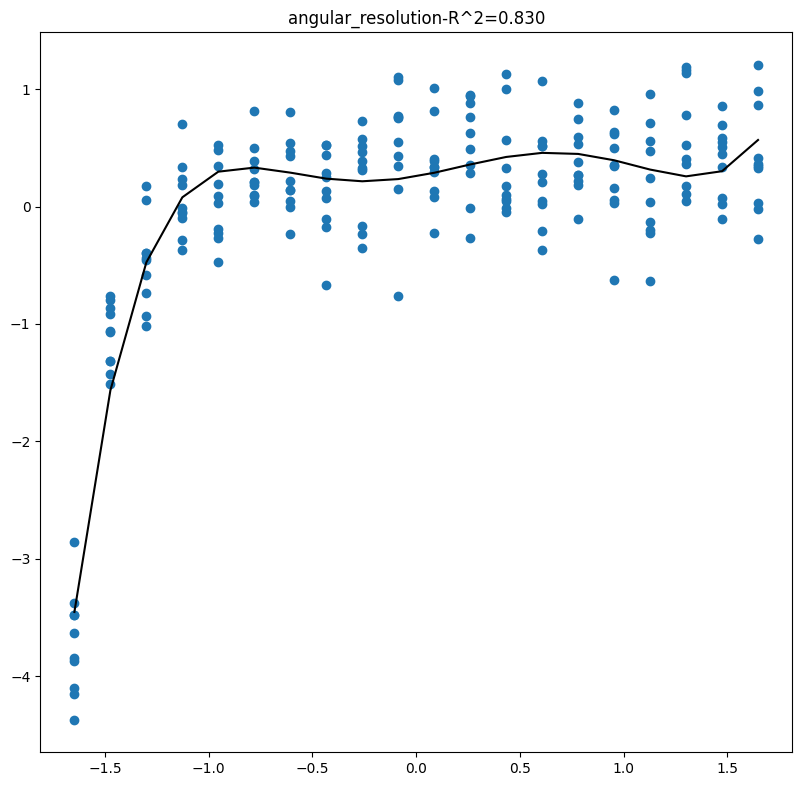

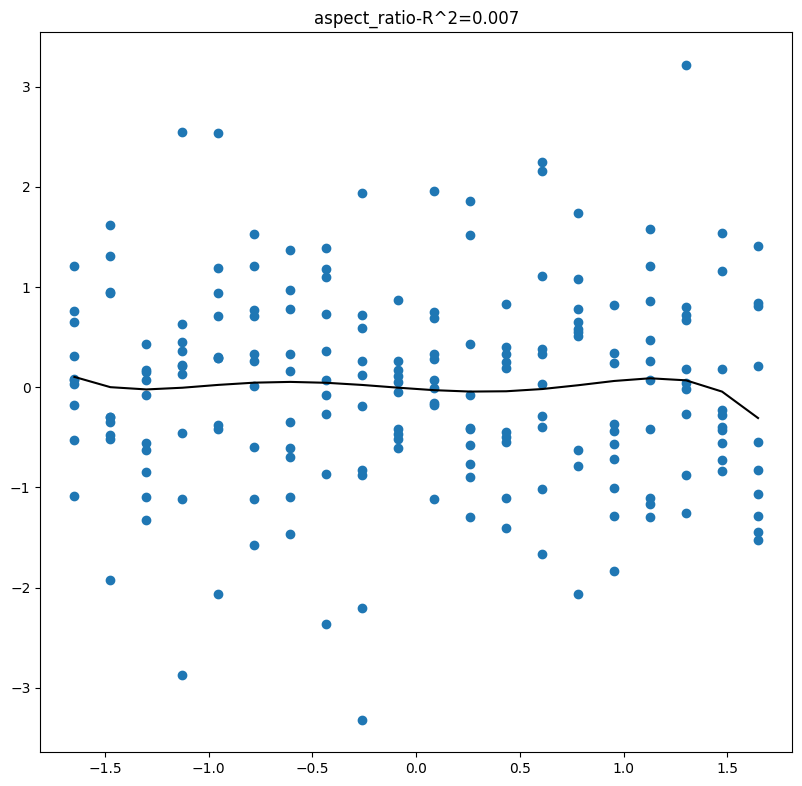

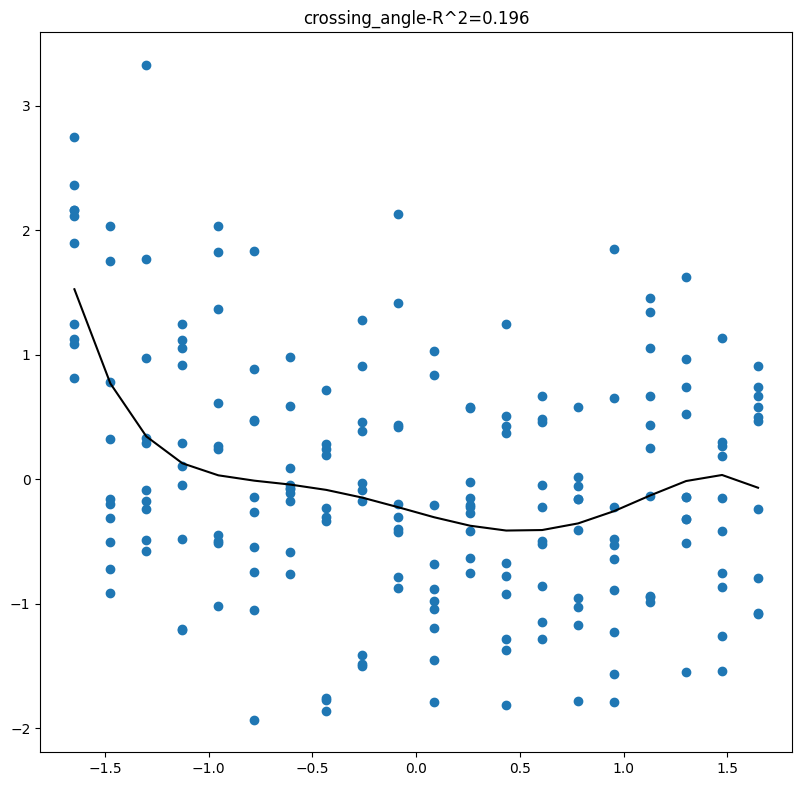

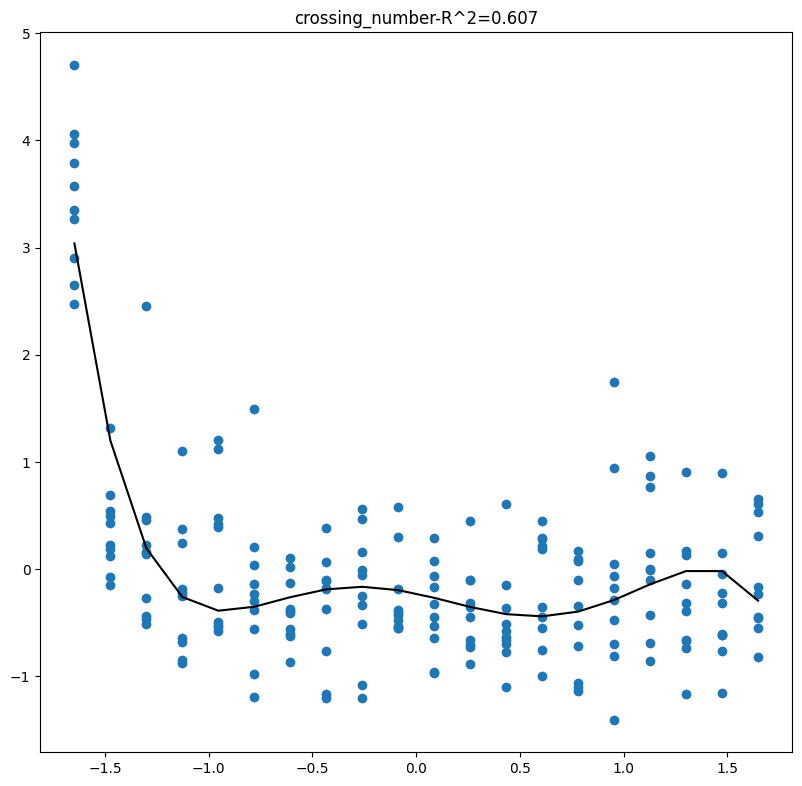

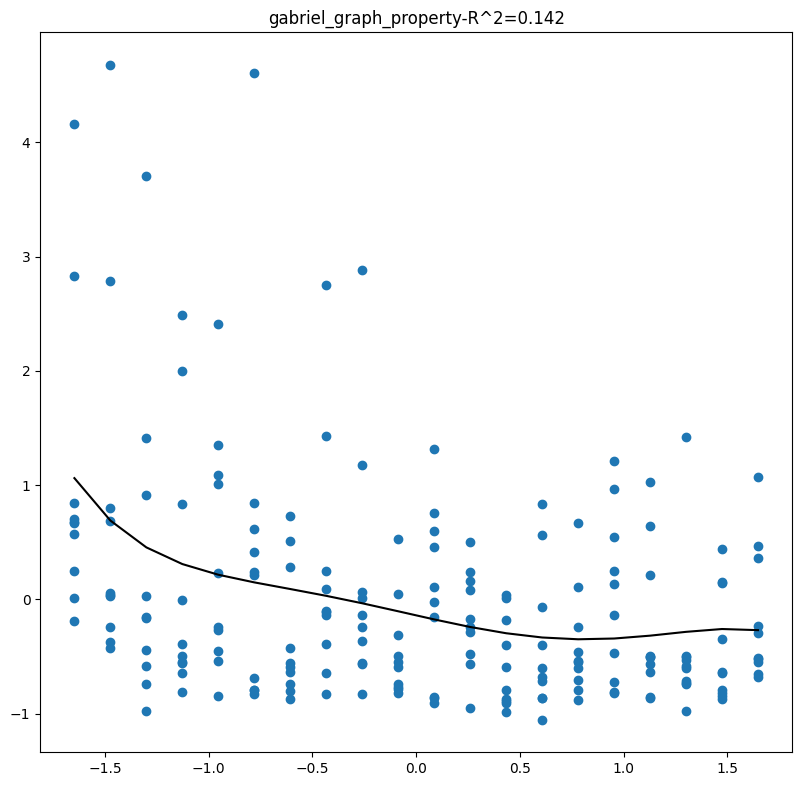

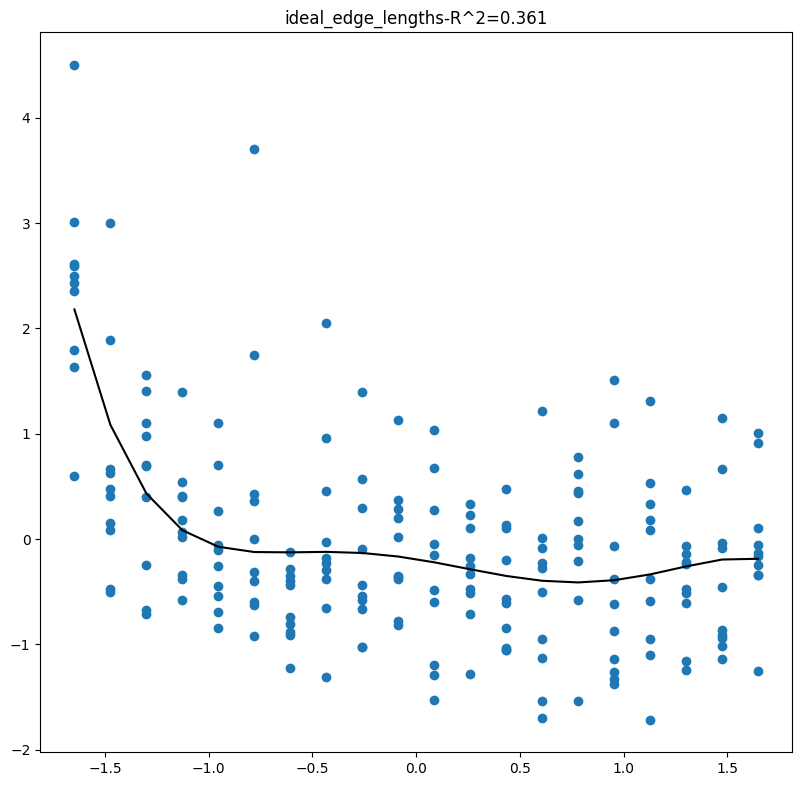

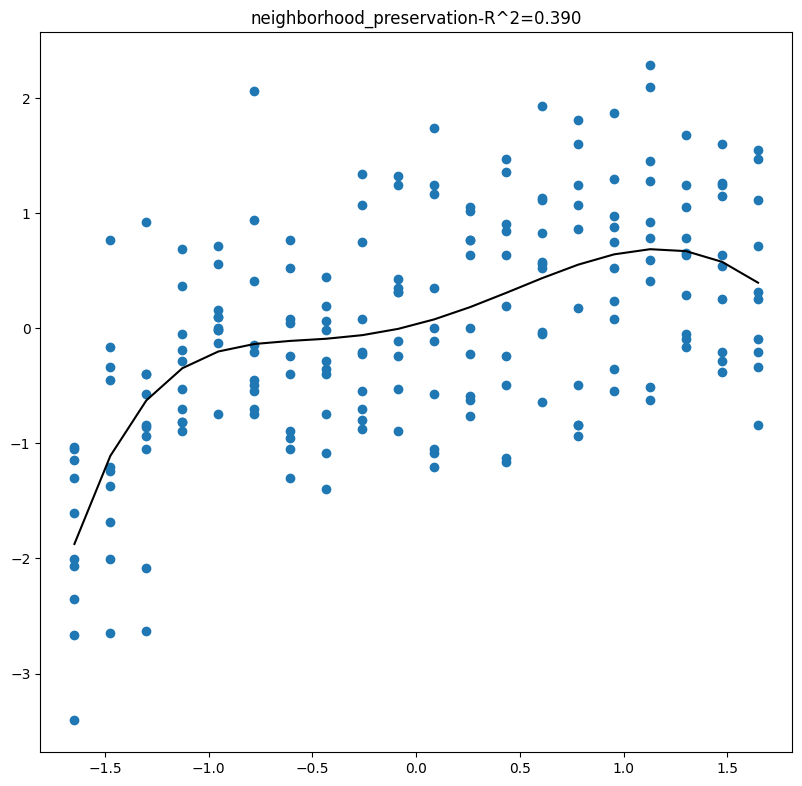

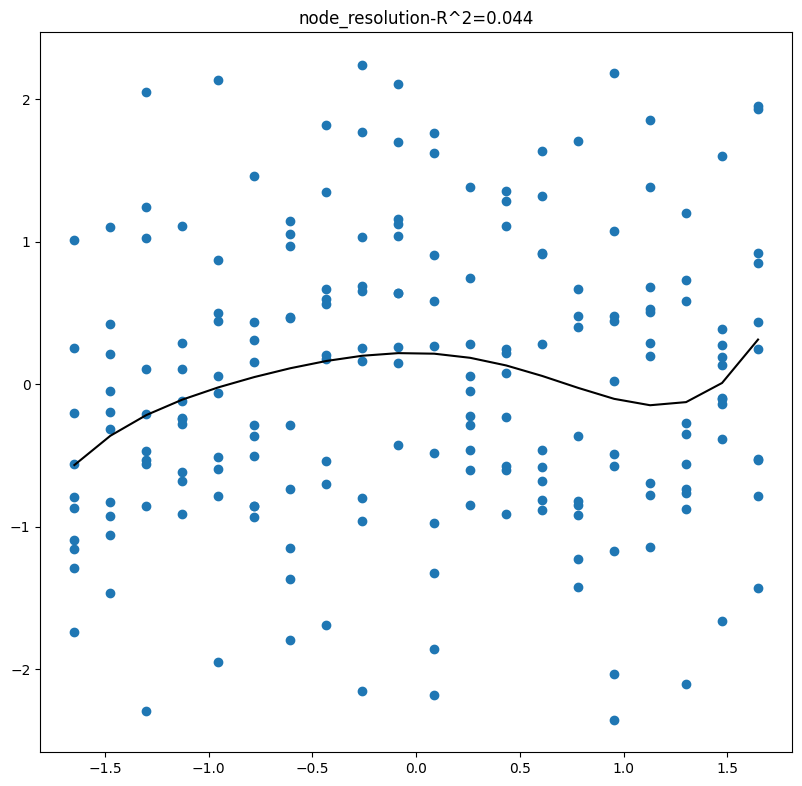

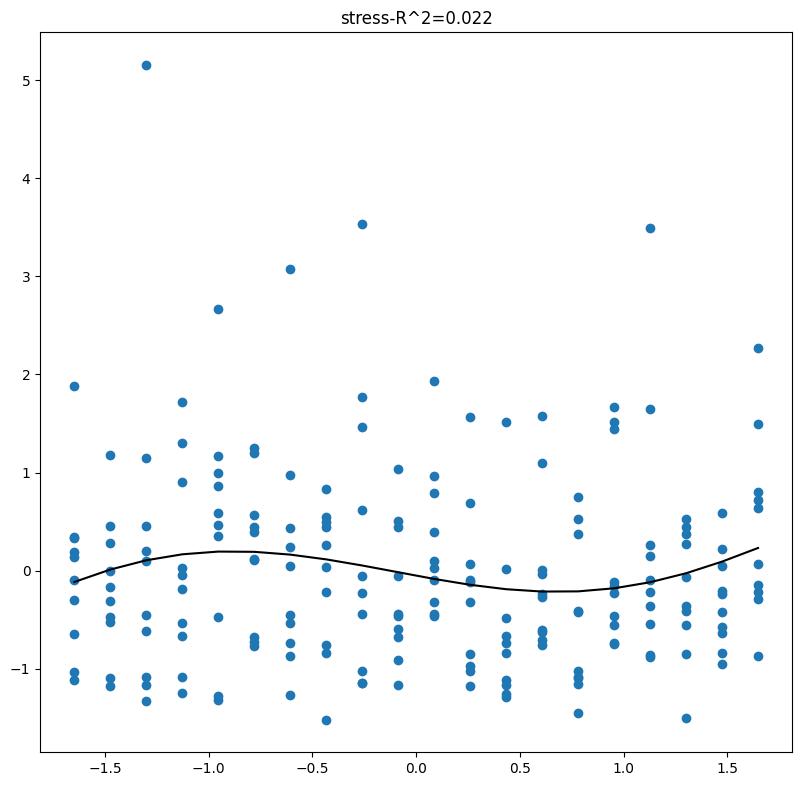

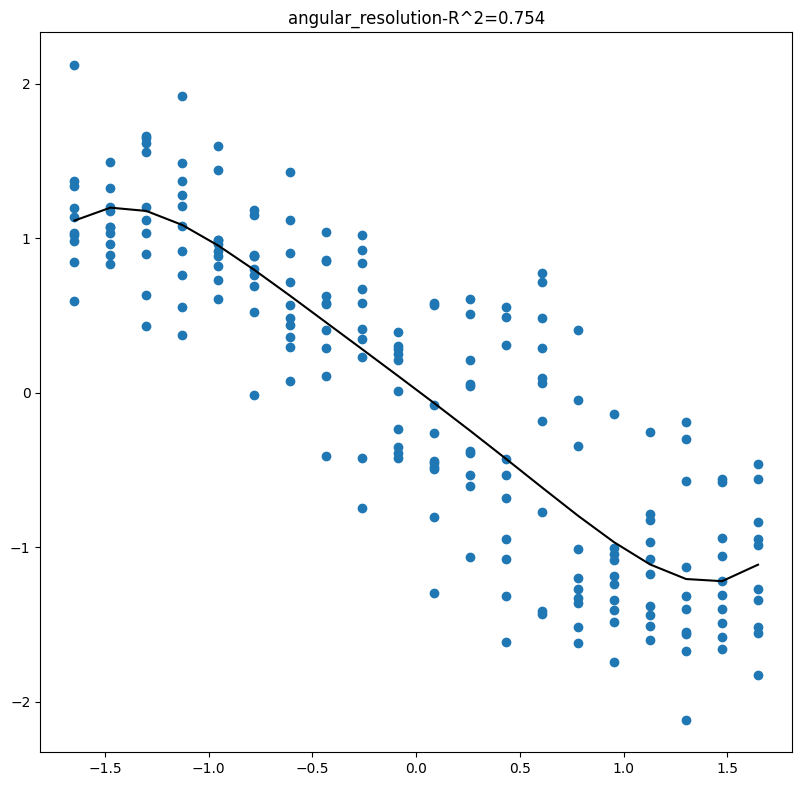

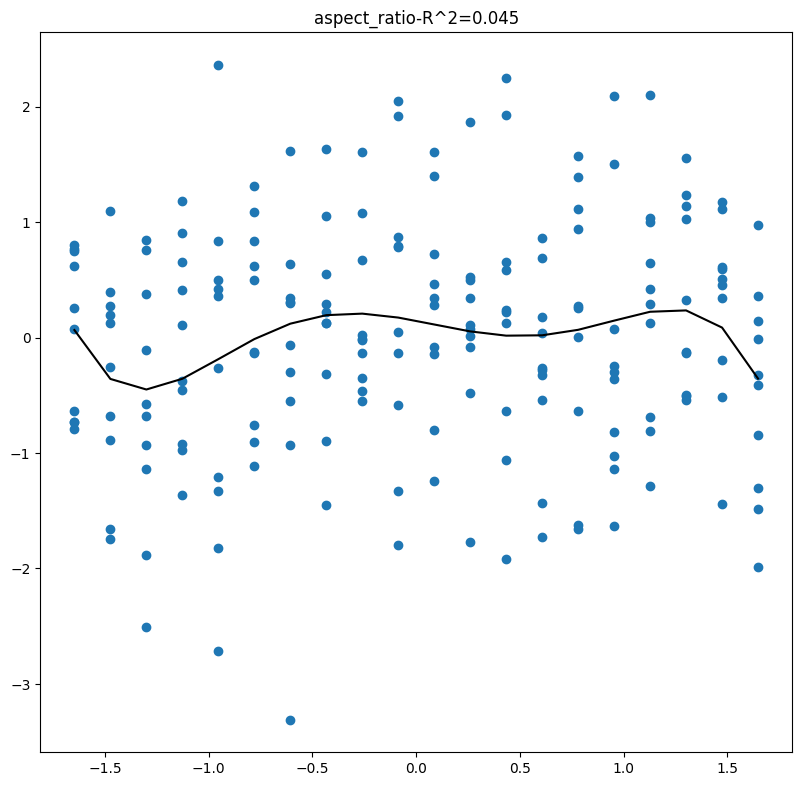

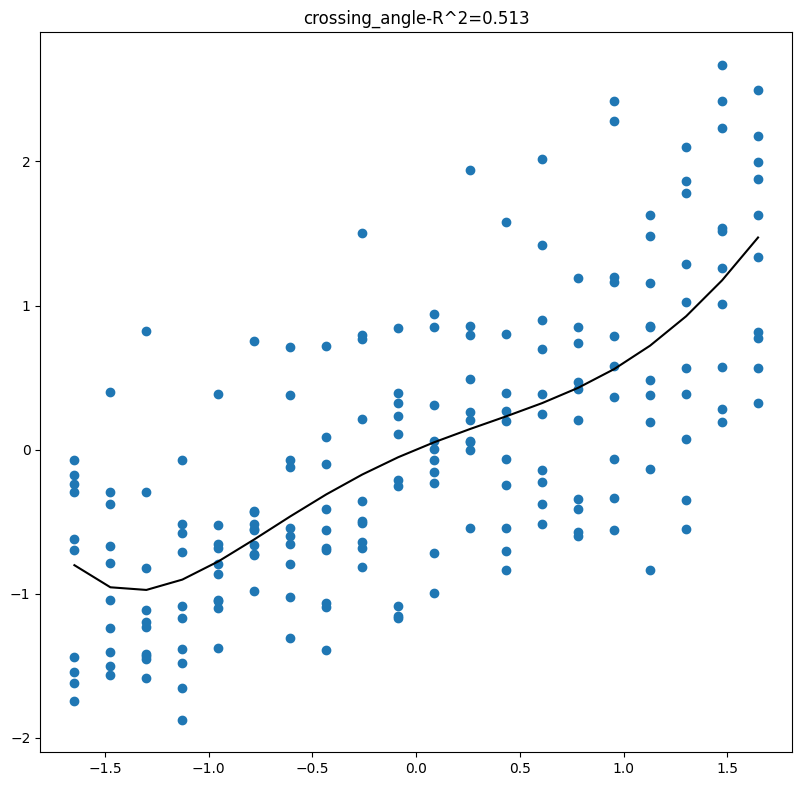

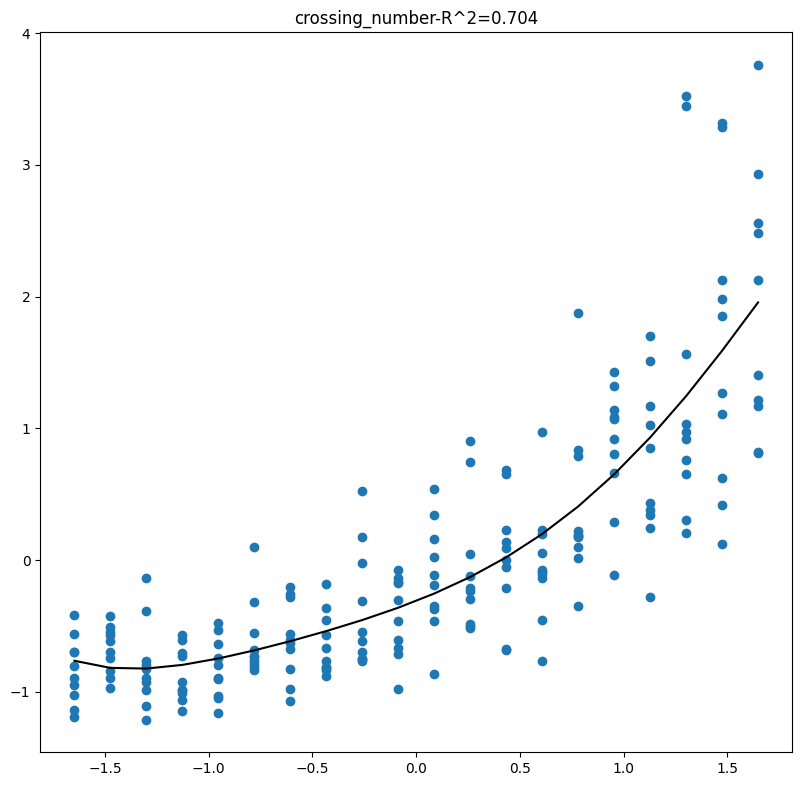

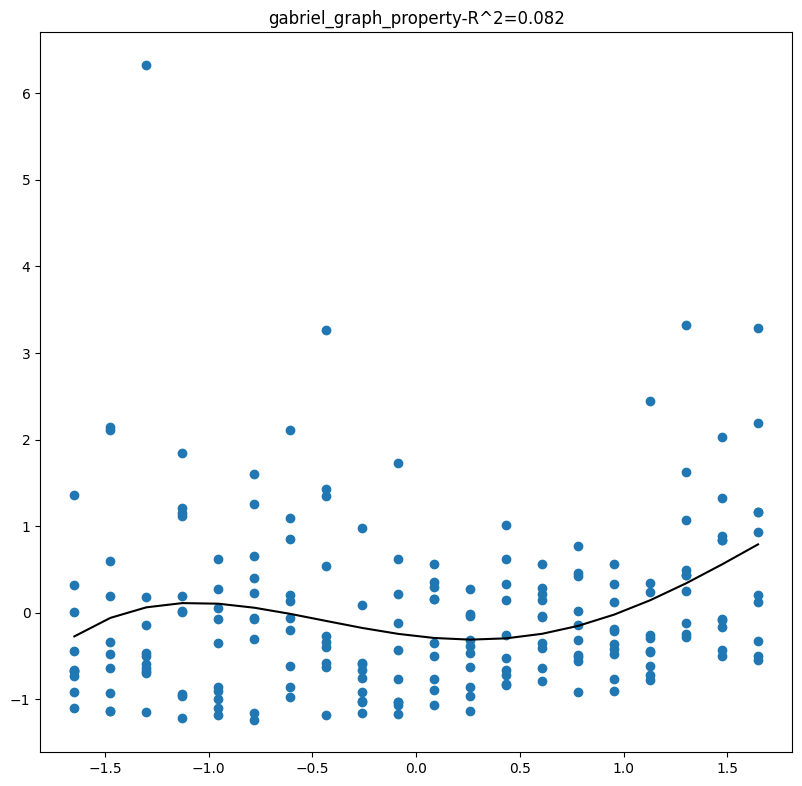

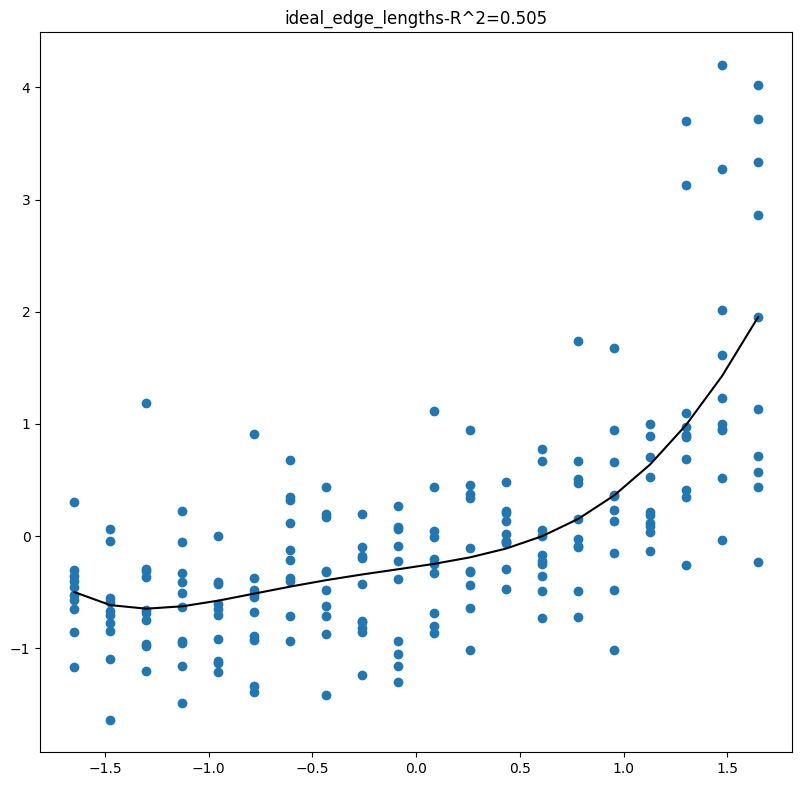

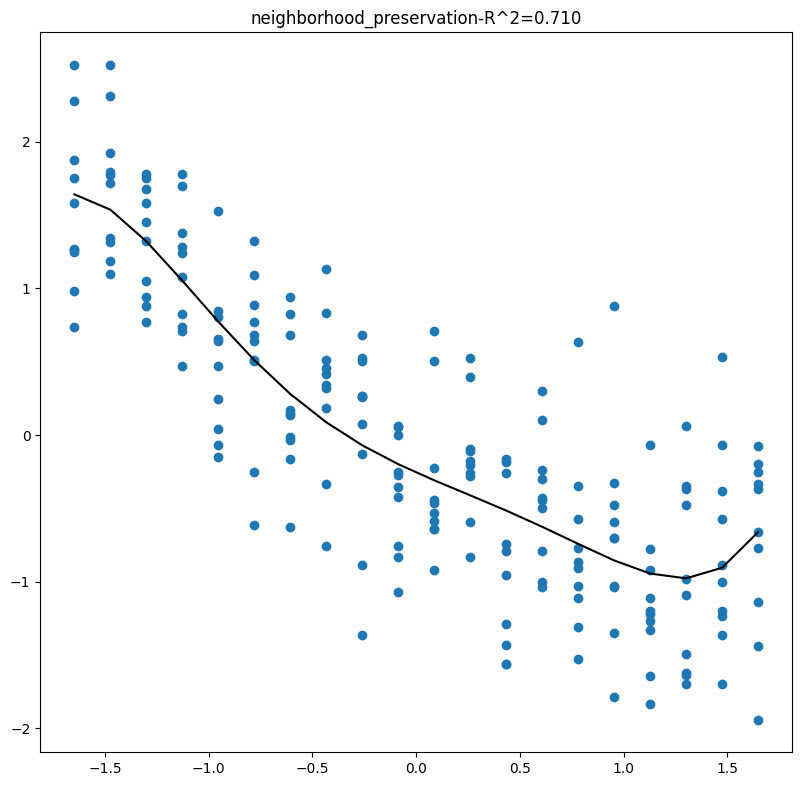

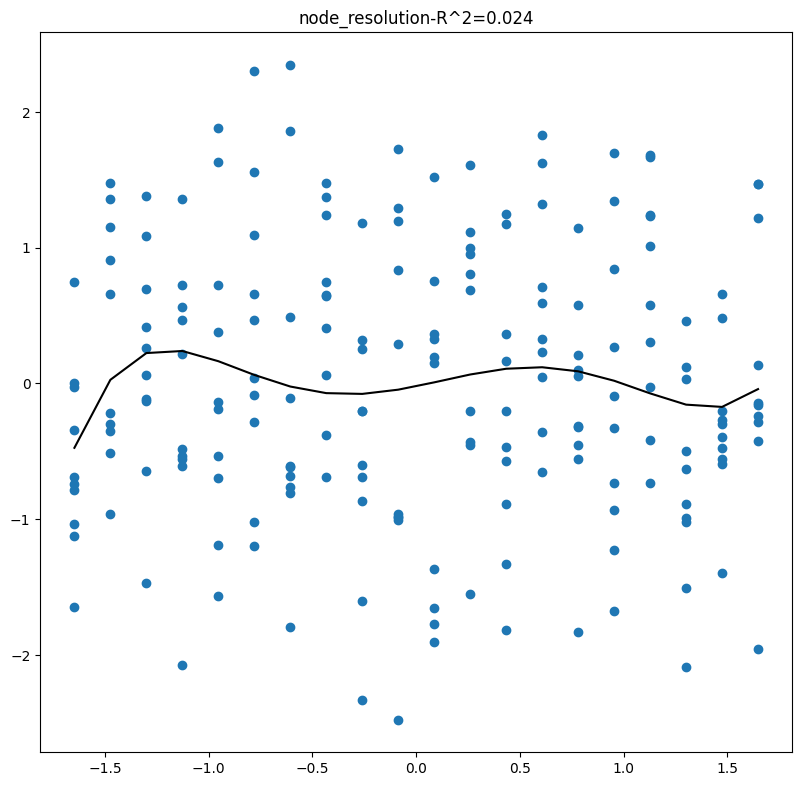

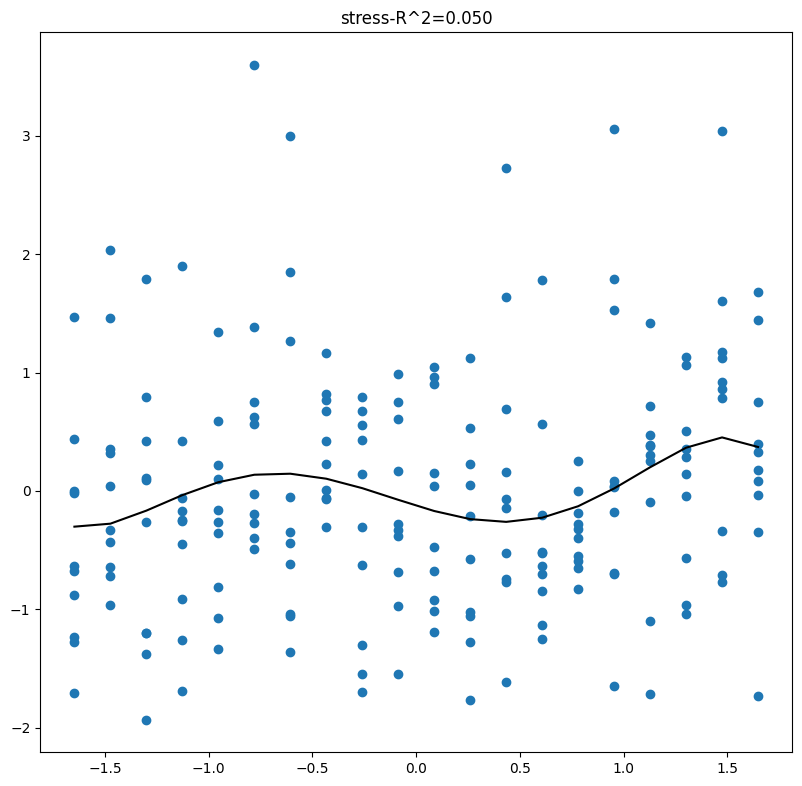

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


deg = [5]
image_path = (
    get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("regression_analysis")
    .joinpath("params")
    .joinpath("images")
)
image_path.mkdir(parents=True, exist_ok=True)

for params_name in PARAMS_NAMES:
    for qm_name in ALL_QM_NAMES:
        print(params_name, qm_name)
        fig, axis = plt.subplots(1, 1, figsize=(8, 8))

        for d in deg:
            regr = Pipeline(
                [
                    ("poly", PolynomialFeatures(degree=d)),
                    ("linear", LinearRegression()),
                ]
            )

            regr.fit(xss[params_name], yss[params_name][qm_name])

            p_poly = regr.predict(xss[params_name])

            axis.scatter(xss[params_name], yss[params_name][qm_name])
            axis.plot(xss[params_name], p_poly, color="black")
            axis.set_title(f'{qm_name}-{"R^2={:.3f}".format(regr.score(xss[params_name], yss[params_name][qm_name]))}')
        fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.95)
        plt.savefig(image_path.joinpath(f'{DATASET_NAME}-{params_name}-{qm_name}.png'))



In [12]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt


# deg = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# image_path = (
#     get_project_root_path()
#     .joinpath("data")
#     .joinpath("experiments")
#     .joinpath("regression_analysis")
#     .joinpath("params")
#     .joinpath("images")
# )
# image_path.mkdir(parents=True, exist_ok=True)

# for params_name in PARAMS_NAMES:
#     for qm_name in ALL_QM_NAMES:
#         print(params_name, qm_name)
#         fig, axes = plt.subplots(2, 5, figsize=(25, 8))

#         for d in deg:
#             regr = Pipeline(
#                 [
#                     ("poly", PolynomialFeatures(degree=d)),
#                     ("linear", LinearRegression()),
#                 ]
#             )

#             regr.fit(xss[params_name], yss[params_name][qm_name])

#             p_poly = regr.predict(xss[params_name])

#             if d < 6:
#                 i, j = 0, d - 1
#             else:
#                 i, j = 1, d - 6

#             axes[i][j].scatter(xss[params_name], yss[params_name][qm_name])
#             axes[i][j].plot(xss[params_name], p_poly, color="black")
#             axes[i][j].set_title(
#                 "R^2={:.3f}".format(
#                     regr.score(xss[params_name], yss[params_name][qm_name])
#                 )
#             )
#         fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.95)
#         plt.savefig(image_path.joinpath(f'{DATASET_NAME}-{params_name}-{qm_name}.png'))


In [13]:
# from sklearn.metrics.pairwise import rbf_kernel
# from sklearn.linear_model import Ridge
# import matplotlib.pyplot as plt
# from sklearn.kernel_ridge import KernelRidge

# for params_name in PARAMS_NAMES:
#     for qm_name in ALL_QM_NAMES:
#         print(params_name, qm_name)
#         kx = rbf_kernel(X=x[params_name], Y=x[params_name], gamma=500)

#         # 線形回帰によるパラメータ学習
#         clf = KernelRidge(alpha=0.0002, kernel='rbf')
#         clf.fit(kx, y[params_name][[qm_name]])

#         # 学習モデルによる予測結果の算出
#         p_lin = clf.predict(kx)

#         # グラフ作成
#         plt.scatter(x[params_name], y[params_name][[qm_name]],label='data')
#         plt.plot(x[params_name], p_lin, color='black', linestyle='-',label='ridge regression')
#         plt.legend()
#         plt.grid()
#         plt.show()

#         # 決定係数の算出
#         print(clf.score(kx, y[params_name][[qm_name]]))

In [14]:
from PIL import Image, ImageDraw, ImageFont


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height), "black")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst



for params_name in PARAMS_NAMES:
    images = []
    tmp = []
    for qm_name in ALL_QM_NAMES:
        img_path = image_path.joinpath(f'{DATASET_NAME}-{params_name}-{qm_name}.png')
        img = Image.open(img_path)

        tmp.append({"image": img})

        if len(tmp) == 3:
            images.append(tmp)
            tmp = []

    dst = None
    for v in images:
        h_dst = None
        for h in v:
            if h_dst is None:
                h_dst = h["image"]
                continue
            h_dst = get_concat_h(h_dst, h["image"])
        if dst is None:
            dst = h_dst
            continue
        dst = get_concat_v(dst, h_dst)
    draw = ImageDraw.Draw(dst)
    font = ImageFont.truetype('Arial.ttf', 36)
    draw.text((40,40), f'{DATASET_NAME}-{params_name}', 'red', font=font)
    dst.save(image_path.joinpath(f'{DATASET_NAME}-{params_name}.png'))